Program jest zrobiony, ale wymaga upiększenia i skomentowania. Zrobię to w piątek 13.03 rano.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Definiowanie 3 klas z parametrami z zadania.

In [74]:
d = {'x':[1,0],'y':[0,1]}
S = pd.DataFrame(d)    #macierz kowariancji
mt1 = np.array([-1,1]) #średnie klas
mt2 = np.array([2,4])
mt3 = np.array([-2,2])
n1 = 30                #liczebność klas
n2 = 30
n3 = 30
n = n1+n2+n3
X1 = np.random.multivariate_normal(mt1, S, n1) #losowanie obserwacji w klasach na podstawie wcześniejszych parametrów
X2 = np.random.multivariate_normal(mt2, S, n2)
X3 = np.random.multivariate_normal(mt3, S, n3)
g = 3

Obliczenie średnich we wszystkich klasach m, macierz zmienności międzygrupowej B, macierz zmienności wewnątrzgrupowej W, macierz służącą do znalezienia kierunku a maksymalizującego J.

In [75]:
m = np.mean(np.array([mt1,mt2,mt3]),0)
B = (np.dot(n1*(mt1 - m), np.transpose(mt1 - m)) + np.dot(n2*(mt2 - m), np.transpose(mt2 - m)) + np.dot(n3*(mt3 - m), np.transpose(mt3 - m)))/(g-1)
W = ((n1 - 1) * S + (n2 - 1) * S + (n3 - 1) * S)/(n-g)
U = np.dot(np.linalg.inv(W),B)
l = np.linalg.eig(U) #wyznaczenie wartości i wektorów własnych U
a = l[1][np.argmax(l[0])] #wektor własny odpowiadający max wartości własnej

Zdefiniowanie funkcji do rzutowania obserwacji na wyznaczony kierunek.

In [76]:
def rzutowanie(X, A):
    Xz = (X[:,1] * A + X[:,0]) / (np.square(A) + 1)
    Yz = A * Xz
    xy = np.array([Xz,Yz])
    return xy

Zrzutowanie obserwacji na kierunek a i wyliczenie średnich dla kadej klasy, aby wykres pozostał czytelny.

In [77]:
A = a[1]/a[0]
r1 = rzutowanie(X1, A)
r2 = rzutowanie(X2, A)
r3 = rzutowanie(X3, A)
m1 = np.mean(r1[0,:])
m2 = np.mean(r2[0,:])
m3 = np.mean(r3[0,:])

Wykreślenie obserwacji, wyznaczonego kierunku rozdzielającego oraz średnich położeń zrzutowanych obserwacji.

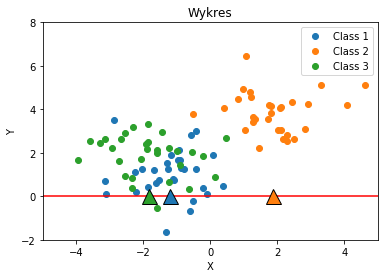

In [78]:
x = np.array([-100, 100])
y = (a[1]/a[0])*x
fig, ax = plt.subplots()
ax.plot(X1[:,0], X1[:,1], 'o', label = 'Class 1')
ax.plot(X2[:,0], X2[:,1], 'o', label = 'Class 2')
ax.plot(X3[:,0], X3[:,1], 'o', label = 'Class 3')
ax.plot(x, y, '-r')
ax.plot(m1,0, 'C0^', ms = 15, mec = 'k')
ax.plot(m2,0, 'C1^', ms = 15, mec = 'k')
ax.plot(m3,0, 'C2^', ms = 15, mec = 'k')
ax.set_title("Wykres")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(-5,5)
ax.set_ylim(-2,8)
ax.legend()
plt.show(fig)